# Суммарные функции распределения света по кольцам радиуса 2.5 м
### для модельных ливней с углами 20-40 град.

In [1]:
!pwd
!date

/home/sphere/Model/Code/02-DrawLDF/DrawSum
Срд Апр  5 17:13:25 MSK 2017


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np

In [3]:
#Прочитать файл 
filename = 'LDF_20-40.csv'
data = pd.read_csv(filename, index_col=0)
data[:3]

,energy,angle,par,num,0,1,2,3,4,5,...,330,331,332,333,334,335,336,337,338,339
0,10,20-40,p,0,2313000.0,16878000.0,29246000.0,33065000.0,36715000.0,56920000.0,...,1037465.0,657081.0,464382.0,783370.0,319640.0,498880.0,179257.0,178573.0,89045.0,9445.0
1,10,20-40,p,1,1485000.0,10883000.0,18936000.0,21570100.0,24161600.0,37696700.0,...,1149850.0,726507.0,515371.0,871140.0,356793.0,555323.0,200379.0,198599.0,100410.0,10590.0
2,10,20-40,p,2,17050000.0,125500000.0,207470000.0,216931000.0,226512000.0,329913000.0,...,550615.0,346544.0,244365.0,412489.0,167784.0,261405.0,93712.0,92610.0,45489.0,5523.0


In [4]:
print(data.index)
print(data.shape)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            723, 724, 725, 726, 727, 728, 729, 730, 731, 732],
           dtype='int64', length=733)
(733, 344)


In [7]:
a = [i*2.5 for i in range(340)]
service = ['energy', 'angle', 'par', 'num']
ldf_param = [x for x in data if x not in service]

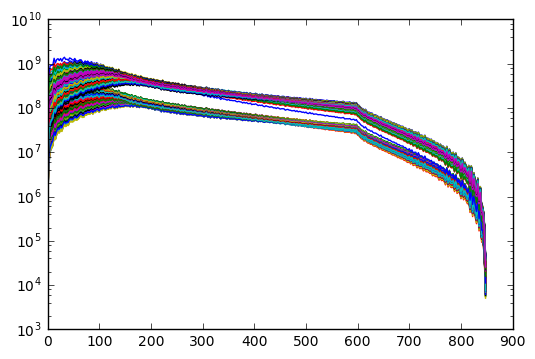

In [8]:
for i in range(data.shape[0]):
    ldf = data[ldf_param][(data.index == i)].values
    plt.semilogy(a,ldf[0])

(10000000.0, 1000000000.0)

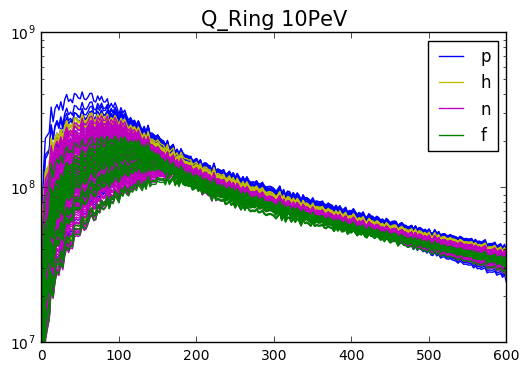

In [9]:
a = [i*2.5 for i in range(340)]

def plot_ldf(par, color):
    ldf = data[ldf_param][(data.par == par) & (data.energy == en)].values
    for i in range(len(ldf)):
        plt.semilogy(a,ldf[i], color)
    plt.semilogy(a,ldf[i], color, label=par)  
    
en = 10
plot_ldf('p', 'b')
plot_ldf('h', 'y')
plot_ldf('n', 'm')
plot_ldf('f', 'g')

plt.title('Q_Ring 10PeV', size = 15)
plt.legend(loc=1)

plt.xlim(0,600)
plt.ylim(1e7, 1e9)

(40000000.0, 2000000000.0)

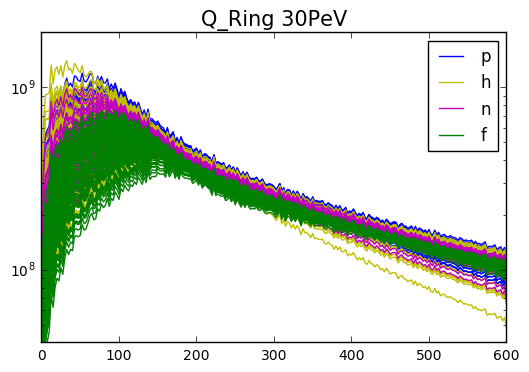

In [10]:
en = 30

plot_ldf('p', 'b')
plot_ldf('h', 'y')
plot_ldf('n', 'm')
plot_ldf('f', 'g')

plt.title('Q_Ring 30PeV', size = 15)
plt.legend(loc=1)

plt.xlim(0,600)
plt.ylim(4e7, 2e9)

In [11]:
def calculateSum(ldf):
    service = ['energy', 'angle', 'par', 'num']
    ldf_param = [x for x in data if x not in service]

    energy   = ldf['energy'].values[0]
    particle = ldf['par'].values[0]
    angle    = ldf['angle'].values[0]
    num      = ldf['num'].values[0]
    a        = ldf[ldf_param].values[0]
    
    step = 2.5 ## 2.5 m in step
    Q = 0
    Q35 = 0
    Q50 = 0
    Q70 = 0
    QR35_70  = 0
    QR50_200 = 0
    QR70_150 = 0
    
    for i in range (len(a)):
        Q   += a[i]
        r = i * step
        
        if(r <= 35):
            Q35 += a[i]
        if(r <= 50):
            Q50 += a[i]
        if(r <= 70):
            Q70 += a[i]

        if((r > 35) & (r < 70)):
            QR35_70  += a[i]
        if((r > 70) & (r < 150)):
            QR70_150 += a[i]
        if((r > 50) & (r < 200)):
            QR50_200 += a[i]           

    #print(  particle, energy, angle, num, Q35, Q50, Q70, Q, QR35_70, QR70_150, QR50_200) 
    return [particle, energy, angle, num, Q35, Q50, Q70, Q, QR35_70, QR70_150, QR50_200]

In [12]:
res = []
for i in range(data.shape[0]):
    res.append(calculateSum(data[data.index == i]))

In [13]:
q  = pd.core.frame.DataFrame(res, columns=['part', 'energy', 'angle', 'n','Q35', 'Q50', 'Q70', 'Q', 'QR35_70', 'QR70_150', 'QR50_200'])
q[:4]

,part,energy,angle,n,Q35,Q50,Q70,Q,QR35_70,QR70_150,QR50_200
0,p,10,20-40,0,8.372481e+08,1.468154e+09,2.513525e+09,2.367461e+10,1.541831e+09,5.468256e+09,9.633026e+09
1,p,10,20-40,1,5.658493e+08,1.009420e+09,1.765052e+09,2.144395e+10,1.100736e+09,4.342817e+09,8.034557e+09
2,p,10,20-40,2,4.168016e+09,6.443683e+09,9.506982e+09,3.300975e+10,4.983398e+09,9.054209e+09,1.552396e+10
3,p,10,20-40,3,8.196770e+08,1.425109e+09,2.418441e+09,2.287862e+10,1.471568e+09,5.119477e+09,9.142975e+09


In [14]:
q.to_csv("Q_20-40.csv")